In [1]:
using Plots
# using GR
using IJulia
# using LinearAlgebra

gr() # Plots.GRBackend()

Plots.GRBackend()

In [2]:
DIM = 3
N = 8

RotZ(θ) = [cos(θ) -sin(θ) 0;
           sin(θ)  cos(θ) 0;
           0       0      1];

update(m, θ, x) = (m*RotZ(θ) - [x*ones(N) zeros(N) zeros(N)])

model = 2 .* (rand(N, DIM) .- .5)
# model = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]

8×3 Array{Float64,2}:
 -0.129852  -0.413407  -0.362117
 -0.876812   0.936379   0.880129
  0.6204    -0.333823  -0.482018
 -0.654041   0.185351  -0.448893
 -0.476791   0.905066  -0.644576
  0.639843  -0.318843   0.920039
  0.690054   0.918927  -0.93171 
  0.807426  -0.127982  -0.645193

In [3]:
function CarttoSph(x::Array)
    r = sqrt.(x[:,1].^2+x[:,2].^2+x[:,3].^2)
    θ = acos.(x[:,3]./r)
    ϕ = atan.(x[:,2]./x[:,1])
    r,θ,ϕ
end

CarttoSph (generic function with 1 method)

In [4]:
r,θ,ϕ = CarttoSph(model)

([0.564708, 1.55571, 0.853625, 0.814635, 1.20911, 1.16513, 1.47942, 1.04144], [2.26692, 0.969464, 2.17083, 2.1544, 2.13305, 0.660568, 2.25207, 2.23893], [1.26645, -0.818238, -0.493642, -0.276153, -1.08594, -0.462298, 0.926697, -0.157198])

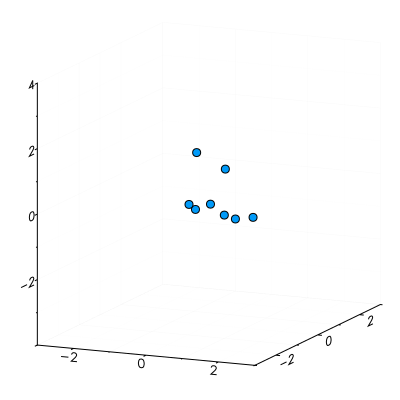

In [5]:
scatter(model[:,1], model[:,2], model[:,3])
plot!(lims = (-3, 3), size = (400,400), legend = false)

In [6]:
P = 1.5
θ = π/16

0.19634954084936207

In [7]:
myview = update(model, θ, P)

8×3 Array{Float64,2}:
 -1.70801   -0.380131  -0.362117
 -2.17729    1.08944    0.880129
 -0.956646  -0.448442  -0.482018
 -2.10531    0.309387  -0.448893
 -1.79106    0.980693  -0.644576
 -0.934654  -0.437543   0.920039
 -0.643931   0.766647  -0.93171 
 -0.733056  -0.283044  -0.645193

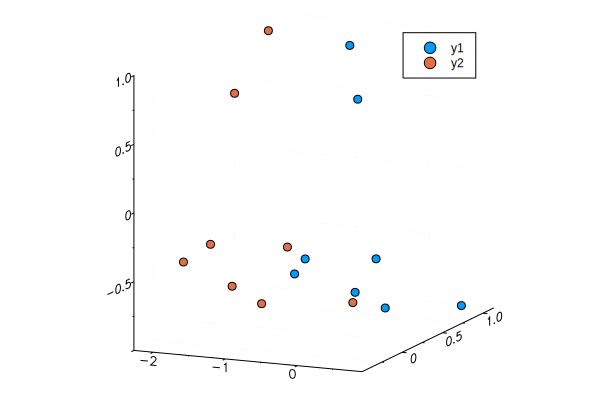

In [8]:
scatter(model[:,1], model[:,2], model[:,3])
scatter!(myview[:,1], myview[:,2], myview[:,3])

In [11]:
function simulate(myview)
    for ii in 1:500
        myview = update(myview, θ, 0)
        scatter(myview[:,1], myview[:,2], myview[:,3], markersize = 2)
        plot!(lims = (-3, 3), size = (400,400), legend = false) |> IJulia.display
        IJulia.clear_output(true)
        sleep(0.00002)
    end
end

simulate (generic function with 1 method)

In [12]:
@time simulate(myview)

  7.018499 seconds (57.97 M allocations: 1.579 GiB, 3.52% gc time)


In [11]:
r = 1.0
s = LinRange(-r,r,100)
x,y = GR.meshgrid(s,s)

([-1.0 -0.979798 … 0.979798 1.0; -1.0 -0.979798 … 0.979798 1.0; … ; -1.0 -0.979798 … 0.979798 1.0; -1.0 -0.979798 … 0.979798 1.0], [-1.0 -1.0 … -1.0 -1.0; -0.979798 -0.979798 … -0.979798 -0.979798; … ; 0.979798 0.979798 … 0.979798 0.979798; 1.0 1.0 … 1.0 1.0])